In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("/home/mohamed/Desktop/Hotel Reservation System/PROJECT CODE/Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Booking_ID'] , inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
df.shape

(36275, 18)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(10275)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(26000, 18)

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    18558
Canceled         7442
Name: count, dtype: int64

###### Our data is imbalanced

In [14]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [15]:
data = df.copy()

In [16]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


##### UNIVARIATE ANALYSIS

In [17]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

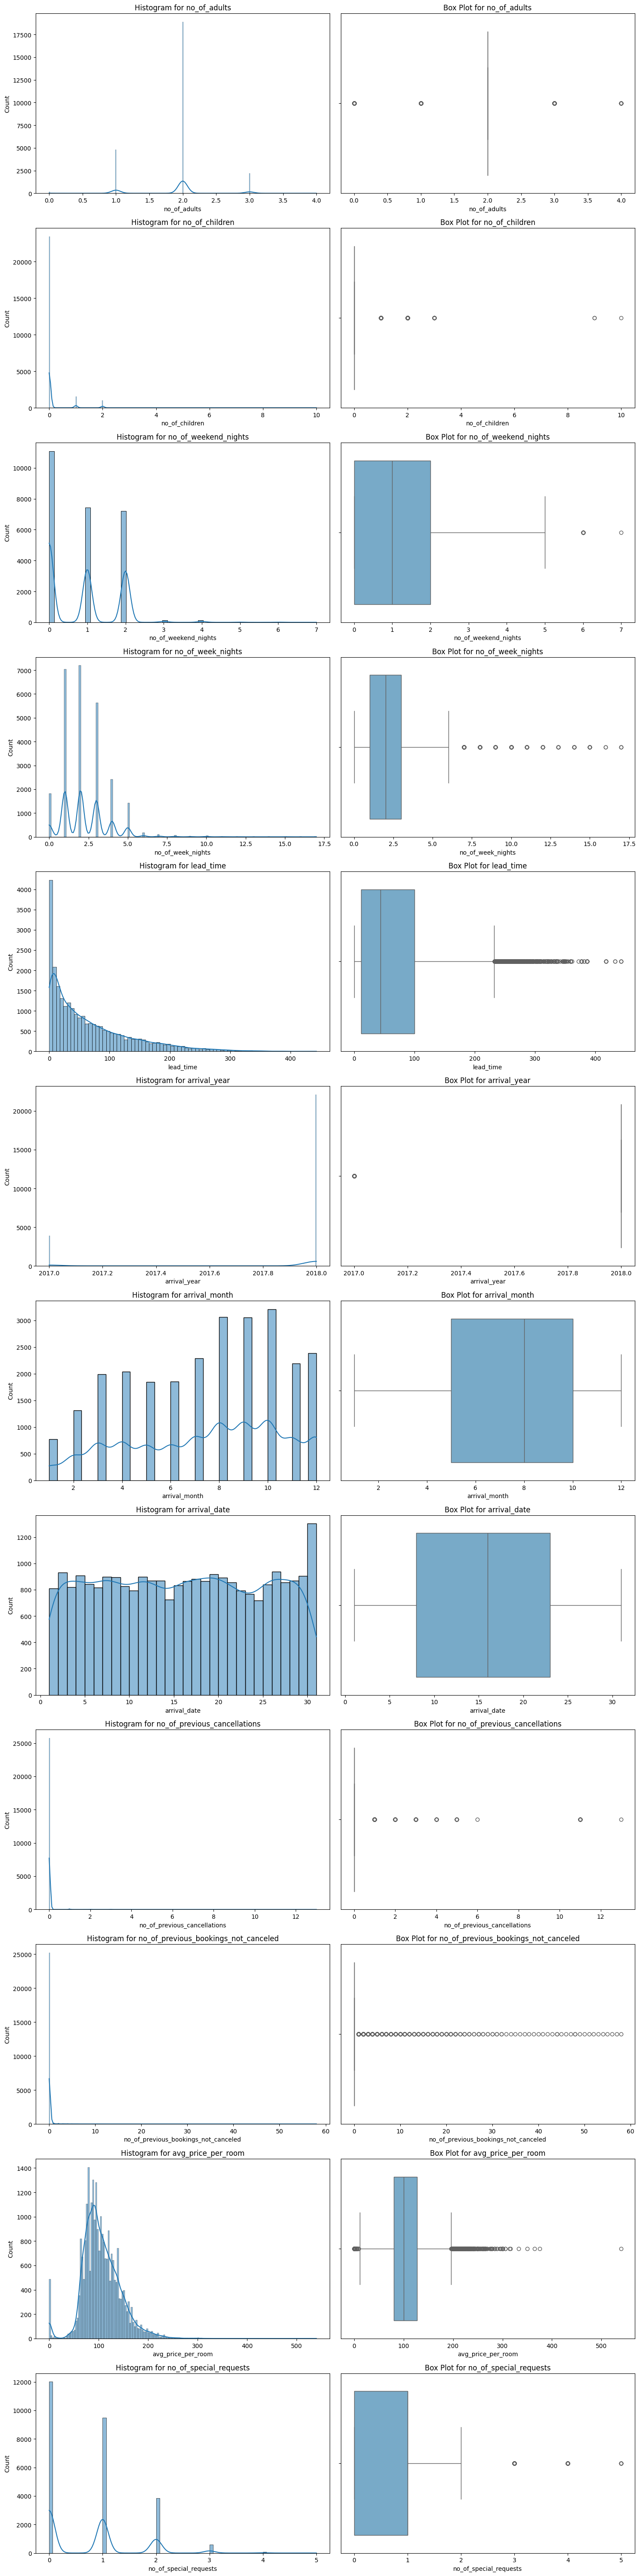

In [18]:
num_plot_dist(data , num_cols)

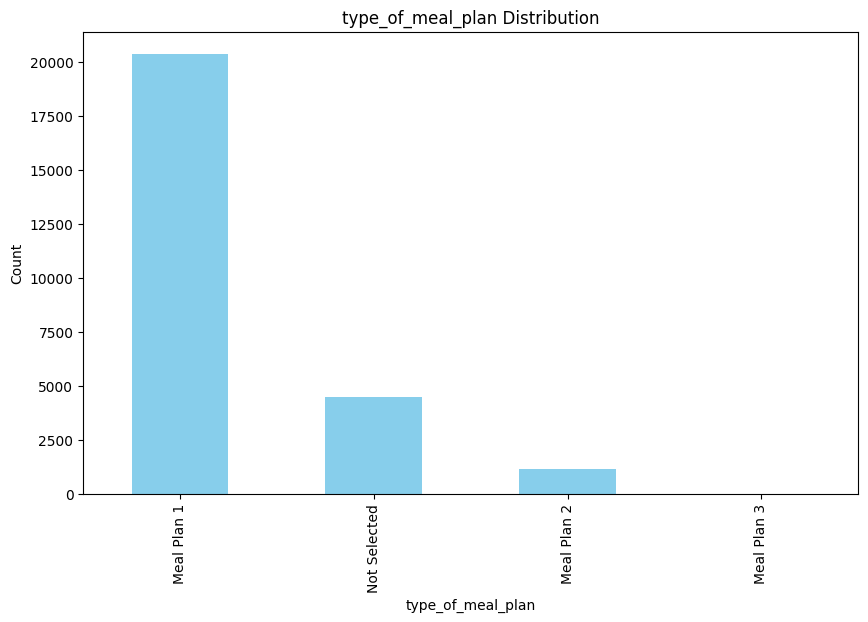

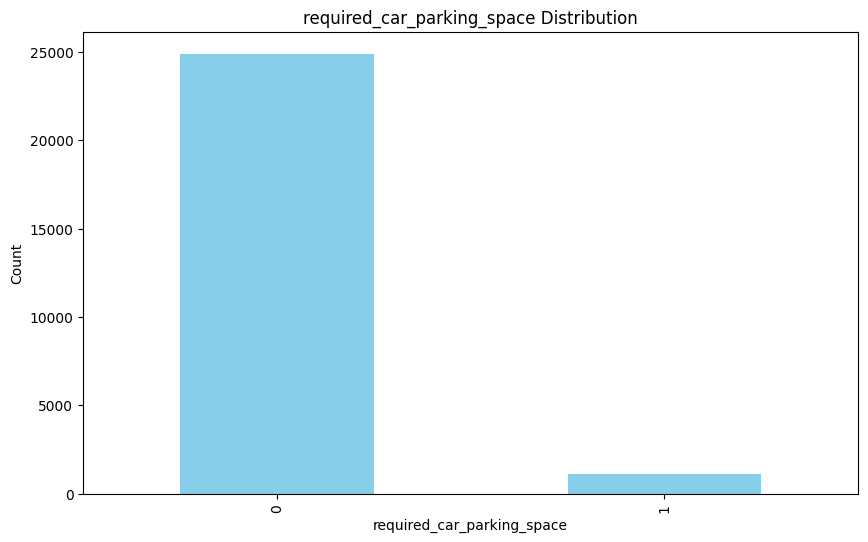

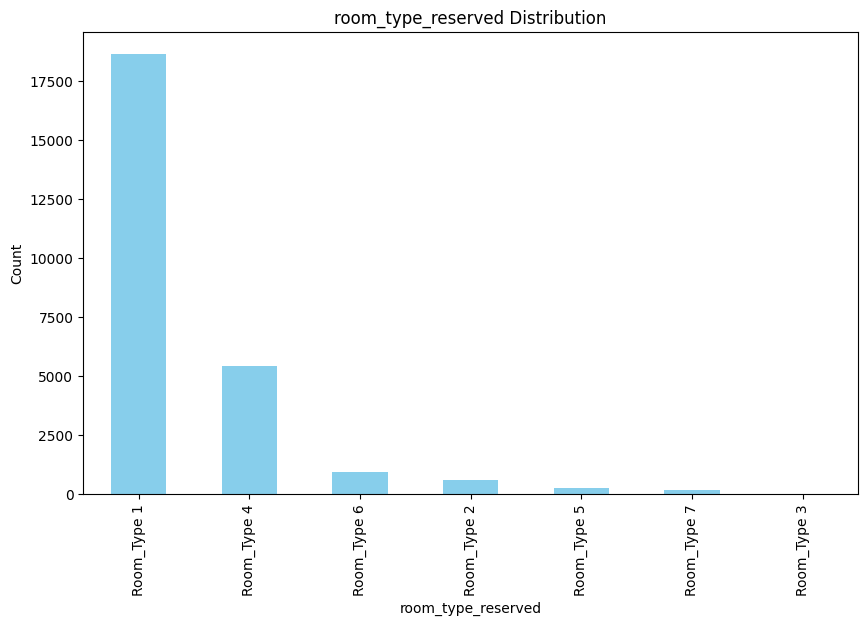

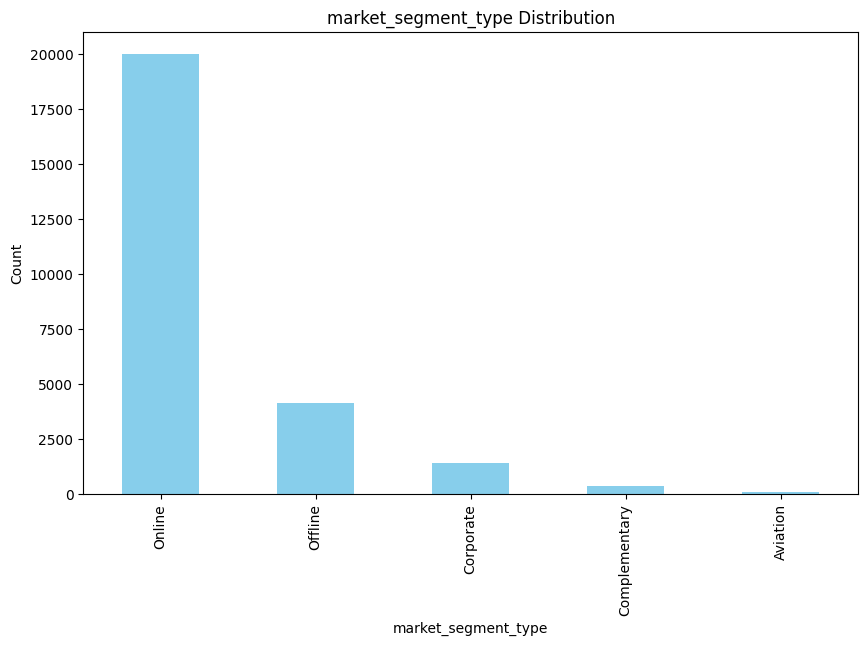

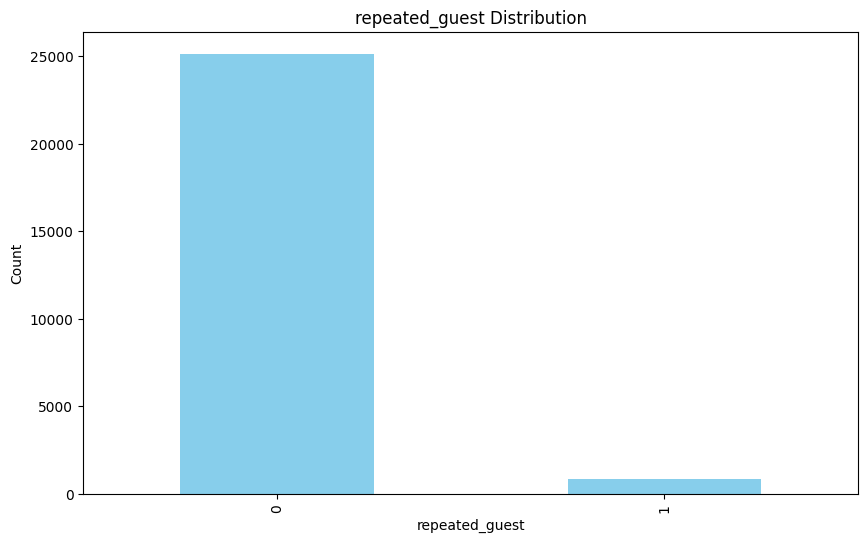

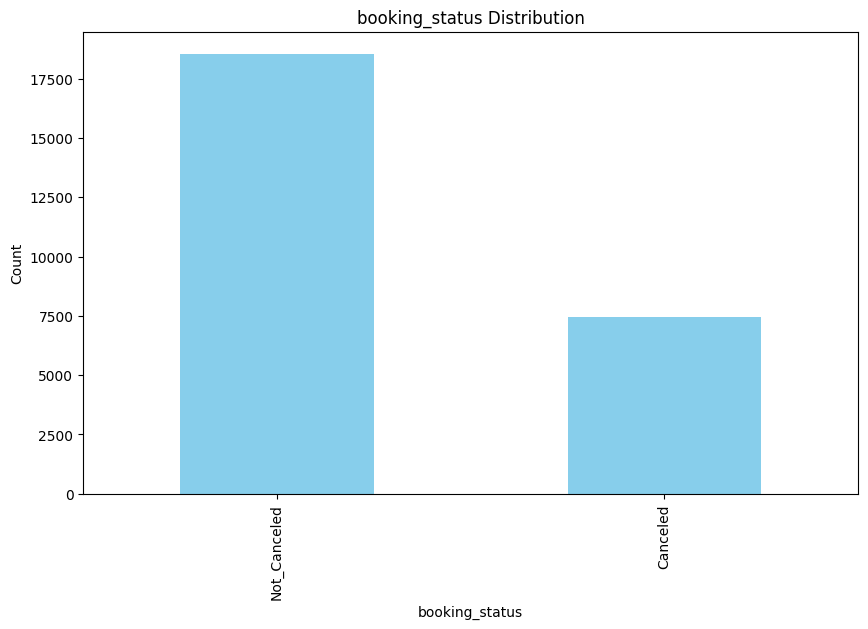

In [19]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivaraite Analysis

In [20]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

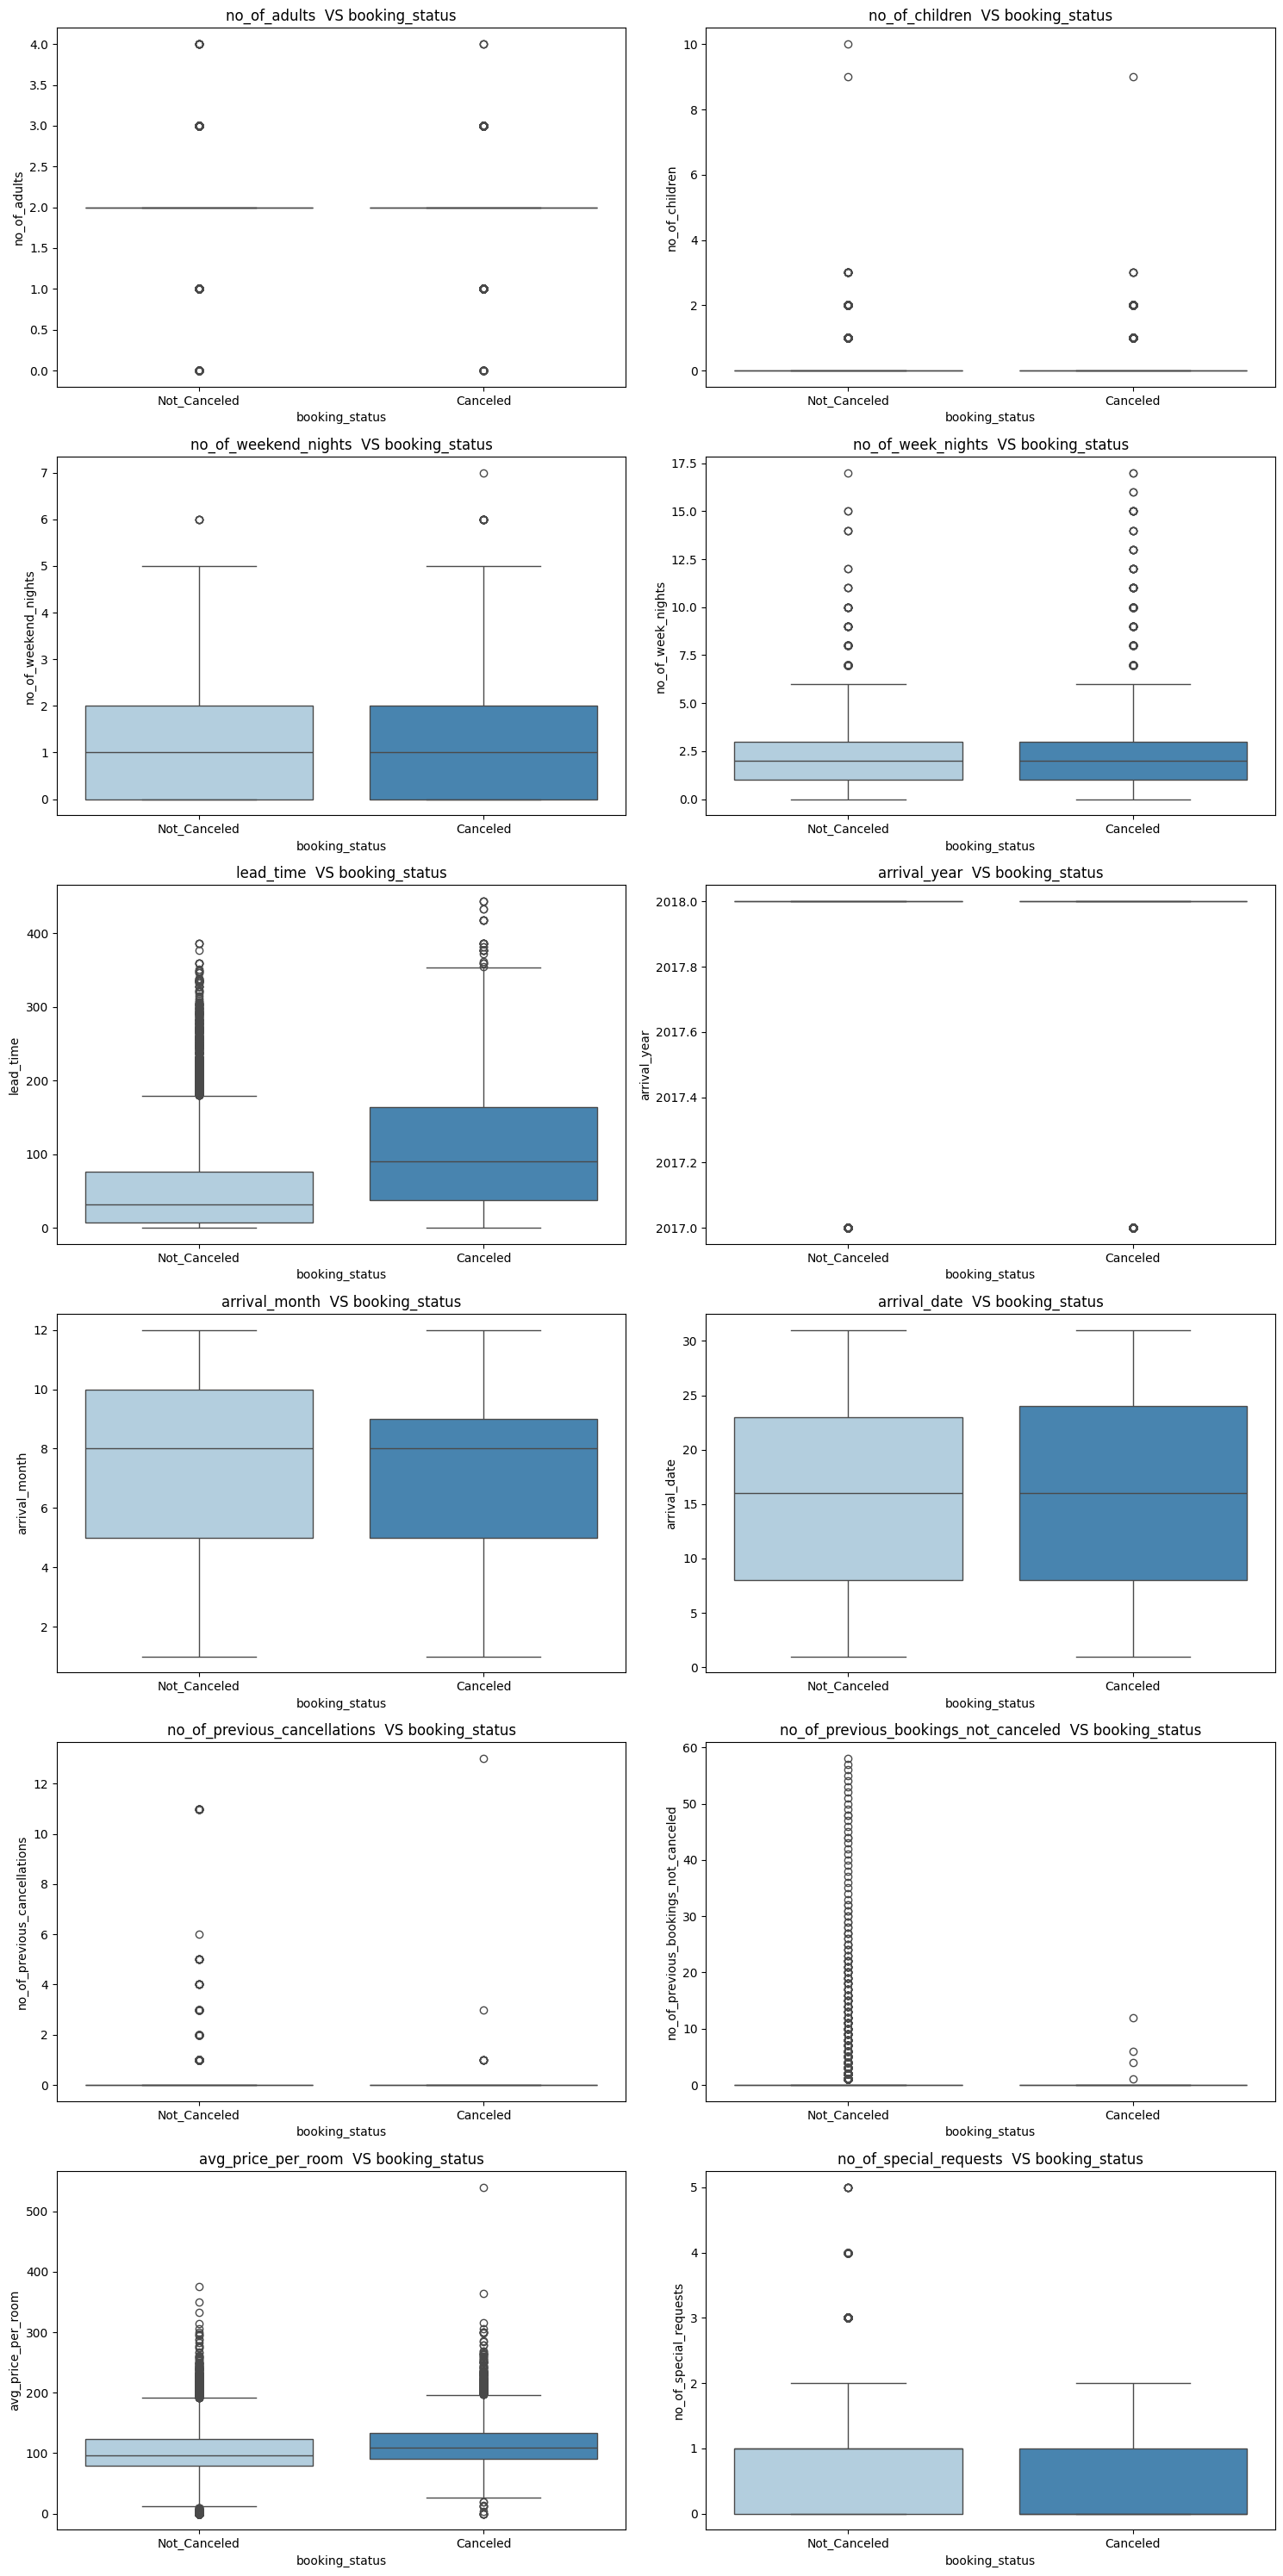

In [21]:
plot_bivariate_num(data , 'booking_status' , num_cols)

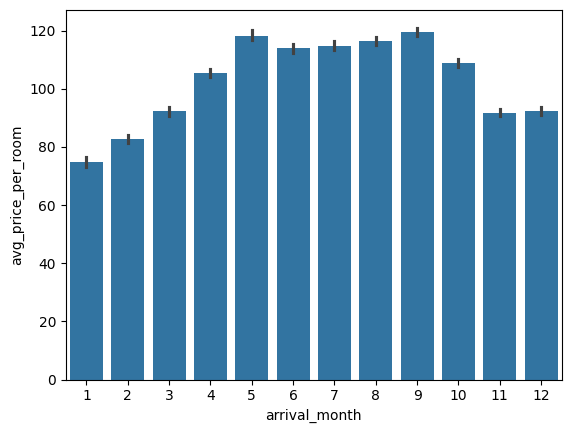

In [22]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [23]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

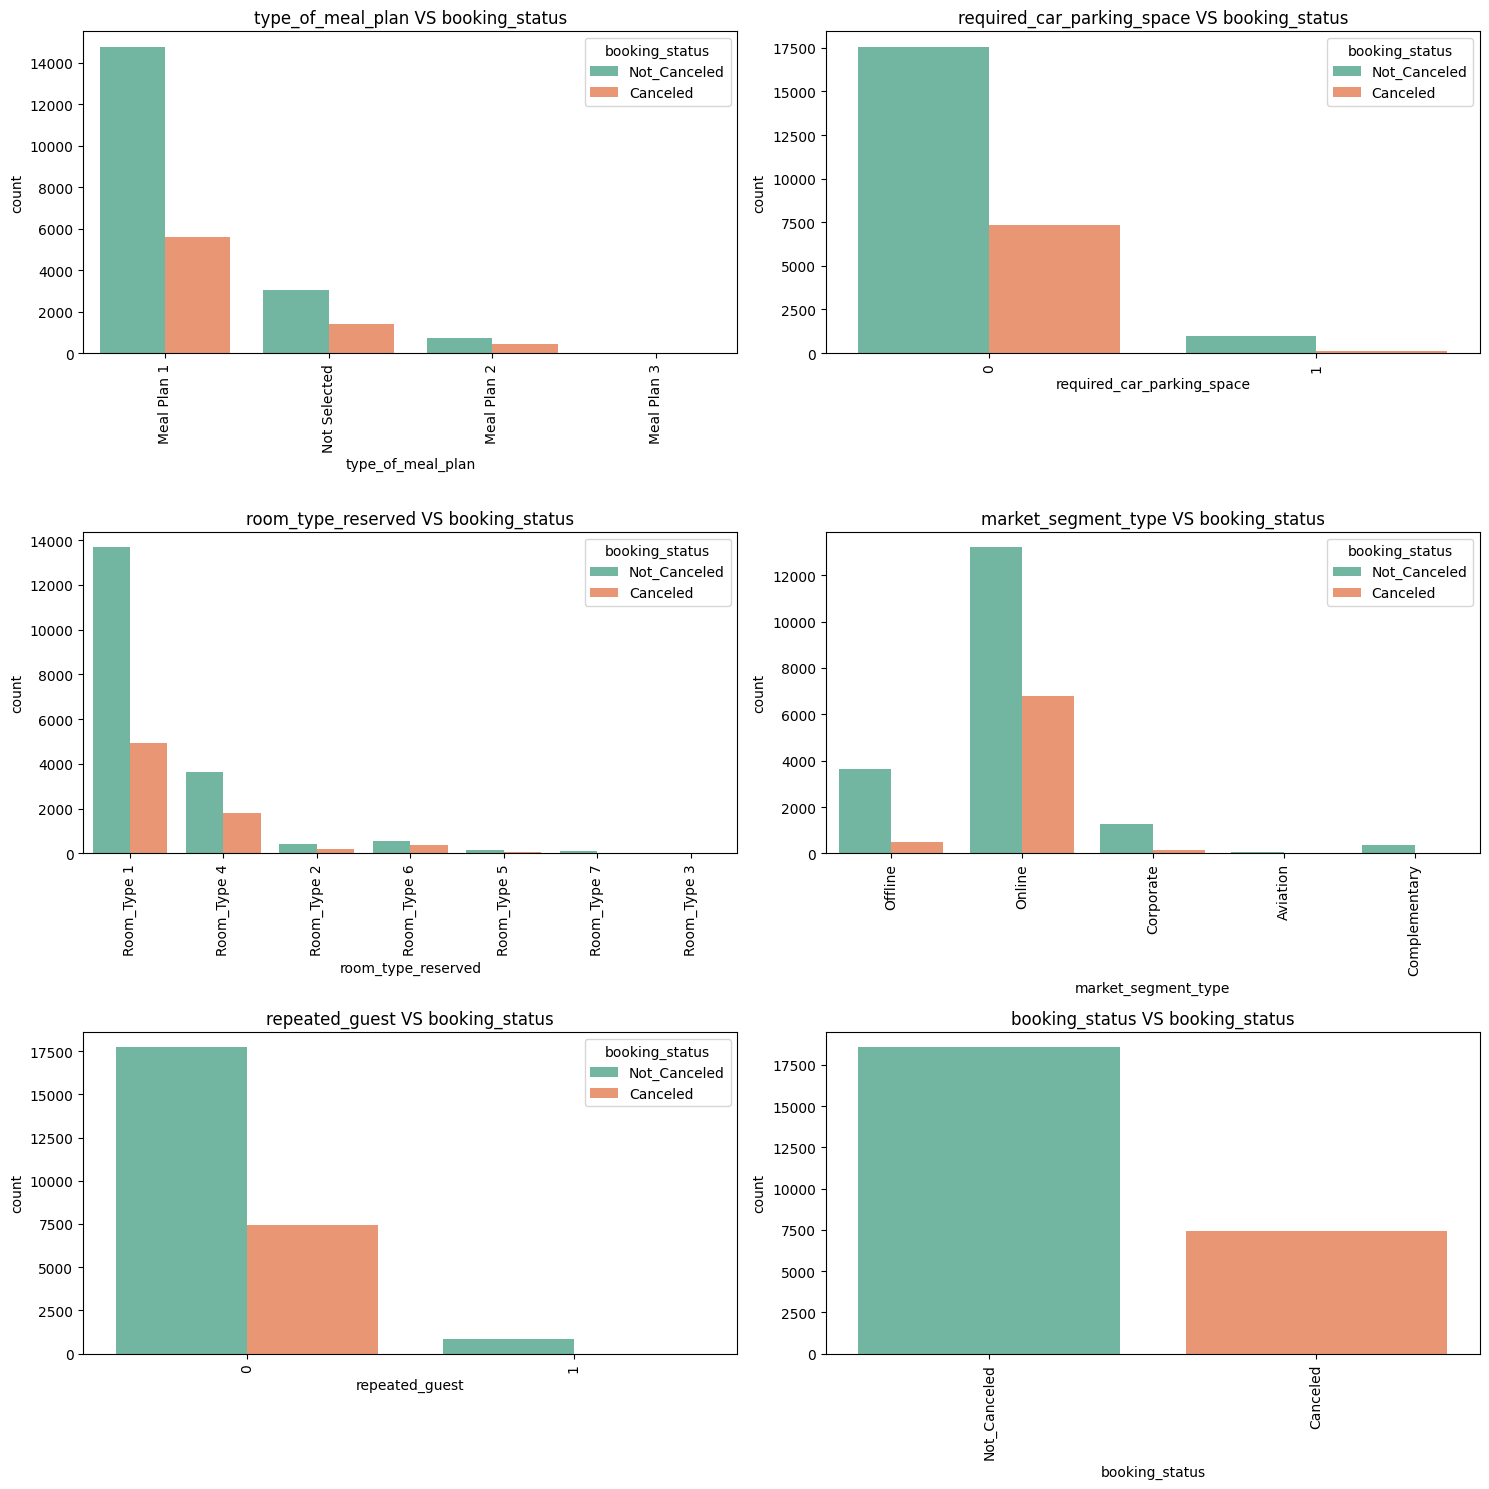

In [24]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

#### DATA PROCESSING

In [25]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

In [27]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    

In [29]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [30]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  int64  
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  int64  
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

In [32]:
### Multicollinearity

In [33]:
!pip install statsmodels

  Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.4 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#calculate Variance Inflation Factor (VIF), which helps detect multicollinearity in your features.
#VIF measures how much a feature is correlated with the other features.

In [36]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [37]:
vif_data

,feature,VIF
0,const,4.129913e+07
1,no_of_adults,1.337855e+00
2,no_of_children,1.284896e+00
3,no_of_weekend_nights,1.077614e+00
4,no_of_week_nights,1.131223e+00
5,type_of_meal_plan,1.177405e+00
6,required_car_parking_space,1.032967e+00
7,room_type_reserved,1.555871e+00
8,lead_time,1.411162e+00
9,arrival_year,1.291251e+00


#### Our data dont have any multicollinearity

In [38]:
corr = df.corr()

In [39]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049246,0.089085,0.110933,-0.010003,-0.002372,0.274697,0.154824,0.094557,0.009344,0.020377,0.306969,-0.240795,-0.063051,-0.146520,0.325352,0.156370,-0.093289
no_of_children,-0.049246,1.000000,0.010017,0.015904,-0.104764,0.020848,0.357778,0.012324,0.030721,0.004888,0.025196,0.096720,-0.049668,-0.021110,-0.029737,0.350109,0.096366,-0.063468
no_of_weekend_nights,0.089085,0.010017,1.000000,0.234186,-0.040495,-0.054212,0.028408,0.134318,0.027833,0.014321,0.005413,0.091357,-0.090030,-0.029229,-0.038840,-0.001932,0.013662,-0.071949
no_of_week_nights,0.110933,0.015904,0.234186,1.000000,-0.077211,-0.059488,0.083989,0.223333,0.015372,0.031120,-0.003860,0.116269,-0.119447,-0.034853,-0.057946,0.015449,0.030336,-0.126924
type_of_meal_plan,-0.010003,-0.104764,-0.040495,-0.077211,1.000000,-0.022719,-0.249130,-0.051198,0.095971,0.009994,-0.005947,0.180623,-0.071741,-0.011717,-0.045657,-0.104665,-0.010854,-0.035108
required_car_parking_space,-0.002372,0.020848,-0.054212,-0.059488,-0.022719,1.000000,0.017725,-0.040525,0.004269,-0.012479,-0.004620,-0.040252,0.107687,0.027046,0.058575,0.057458,0.071079,0.087028
room_type_reserved,0.274697,0.357778,0.028408,0.083989,-0.249130,0.017725,1.000000,-0.013204,0.086421,0.002498,0.029319,0.085663,-0.044617,-0.013340,-0.021578,0.489109,0.088528,-0.072900
lead_time,0.154824,0.012324,0.134318,0.223333,-0.051198,-0.040525,-0.013204,1.000000,0.171537,0.134461,0.036473,0.144750,-0.149185,-0.053972,-0.087298,-0.040446,-0.007849,-0.371473
arrival_year,0.094557,0.030721,0.027833,0.015372,0.095971,0.004269,0.086421,0.171537,1.000000,-0.323118,0.015807,0.108428,-0.008737,0.010835,0.024947,0.173449,-0.001262,-0.152222
arrival_month,0.009344,0.004888,0.014321,0.031120,0.009994,-0.012479,0.002498,0.134461,-0.323118,1.000000,-0.020236,-0.015608,-0.006239,-0.046451,-0.009762,0.067413,0.135426,0.012650


<Axes: >

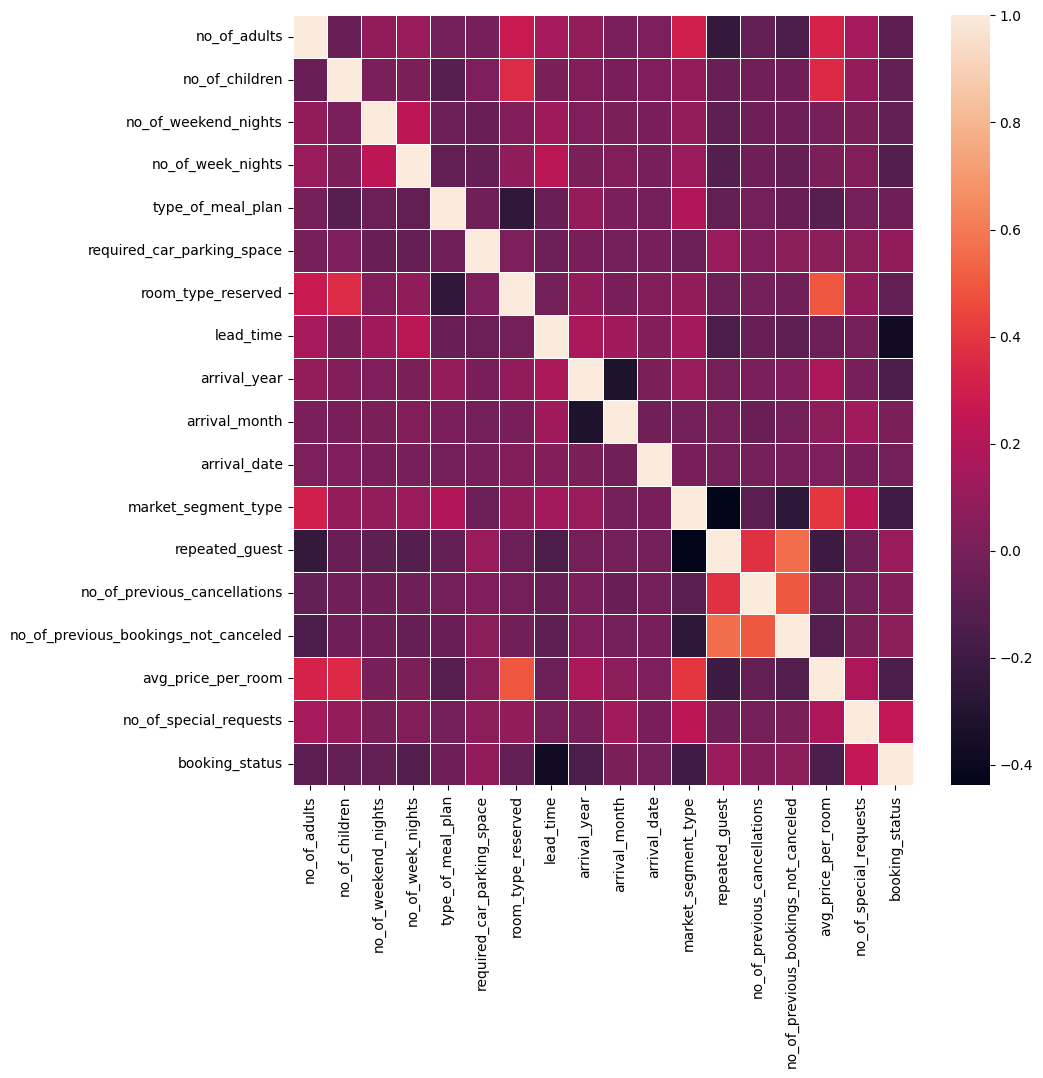

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

In [ ]:
#### Skewness

In [41]:
skewness  = df.skew()

In [42]:
skewness

no_of_adults                            -0.297021
no_of_children                           4.005672
no_of_weekend_nights                     0.659718
no_of_week_nights                        1.601870
type_of_meal_plan                        1.638645
required_car_parking_space               4.559677
room_type_reserved                       1.373156
lead_time                                1.407857
arrival_year                            -1.963466
arrival_month                           -0.292238
arrival_date                             0.012177
market_segment_type                     -2.382309
repeated_guest                           5.249142
no_of_previous_cancellations            21.939192
no_of_previous_bookings_not_canceled    16.298982
avg_price_per_room                       0.588413
no_of_special_requests                   0.911121
booking_status                          -0.945939
dtype: float64

In [43]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [ ]:
#### Imablanced Data

In [44]:
df["booking_status"].value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

In [45]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [46]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [47]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)


In [48]:
y.value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [51]:
y_res

0        1
1        1
2        0
3        0
4        0
        ..
37111    0
37112    0
37113    0
37114    0
37115    0
Name: booking_status, Length: 37116, dtype: int64

In [52]:
y_res.value_counts()

booking_status
1    18558
0    18558
Name: count, dtype: int64

In [53]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [54]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0.0,0.0,0.0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0.0,0.0,0.0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0.0,0.0,0.0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0.0,0.0,0.0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0.0,0.0,0.0,94.50,0,0


In [55]:
balanced_df.shape

(37116, 18)

In [56]:
df = balanced_df.copy()

In [ ]:
df.shape

(37116, 18)

In [57]:
#### Feature Selection

In [58]:
len(df.columns)

18

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [61]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
feature_importance = model.feature_importances_

In [63]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [64]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [65]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [66]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,224,0,65.00,10,2,3,2,1,0,0,1
1,5,1,106.68,11,6,4,3,2,3,0,1
2,1,0,60.00,2,28,4,1,2,0,0,0
3,211,0,100.00,5,20,4,2,0,0,0,0
4,48,0,94.50,4,11,4,1,1,3,0,0


In [67]:
len(top_10_df.columns)

11

In [68]:
df = top_10_df.copy()

### MODEL SELECTION

In [69]:
!pip install xgboost lightgbm

  Using cached xgboost-3.0.4-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.6.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
  Using cached nvidia_nccl_cu12-2.27.7-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-3.0.4-py3-none-manylinux_2_28_x86_64.whl (94.9 MB)
Using cached lightgbm-4.6.0-py3-none-manylinux_2_28_x86_64.whl (3.6 MB)
Using cached nvidia_nccl_cu12-2.27.7-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (322.5 MB)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [71]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [72]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [73]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [74]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [75]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 14922, number of negative: 14770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 29692, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502560 -> initscore=0.010239
[LightGBM] [Info] Start training from score 0.010239


In [76]:
metrics_df= pd.DataFrame(metrics)

In [77]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.882947,0.878316,0.883388,0.880845
1,LogisticRegression,0.767915,0.786120,0.722772,0.753116
2,Gradient Boosting,0.826778,0.806949,0.849560,0.827706
3,Suuport vector classifier,0.729930,0.727603,0.716997,0.722261
4,Decsion Tree,0.829741,0.836932,0.810231,0.823365
5,KNN,0.781250,0.841248,0.682068,0.753341
6,Naive Bayes,0.767511,0.782879,0.726898,0.753851
7,XGboost,0.869477,0.861284,0.874312,0.867749
8,Adaboost,0.801455,0.802632,0.788504,0.795505
9,LGBM,0.856681,0.838599,0.875963,0.856874


In [ ]:
##### TRAIN OUR RF MODEL

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [79]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [80]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [81]:
rf = RandomForestClassifier(random_state=42)

In [82]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [83]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [84]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.5s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....x7ab26b23f500>, 'min_samples_leaf': <scipy.stats....x7ab26fd9a000>, 'min_samples_split': <scipy.stats....x7ab270798980>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [85]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [86]:
best_rf_model = random_search.best_estimator_

In [87]:
y_pred = best_rf_model.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [ ]:
accuracy

0.8799838362068966

In [ ]:
precision

0.8708457173736828

In [ ]:
recall

0.8864136413641364

In [ ]:
f1

0.8785607196401799

In [ ]:
### Save this model

In [89]:
import joblib

In [90]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [91]:
loaded_model=joblib.load("random_forest.pkl")

In [92]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
12105,57,0,60.0,11,17,3,3,0,0,3


In [93]:
new_data = np.array([190,1 ,	93.5,	9	,8,	4,	5,	2,	0,	0]).reshape(1,-1)

In [94]:
predictions=loaded_model.predict(new_data)

In [95]:
predictions

array([1])